Task-2:
Description: Develop a machine learning model to detect fraudulent transactions in a financial dataset.



Data Collection


In [ ]:
import pandas as pd

In [12]:
data=pd.read_csv('creditcard.csv')
print(data)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
2918  2532 -1.096967  0.662235  2.193666 -0.007689 -0.610815  0.765787   
2919  2532  1.191047  0.129128  0.314928  0.946240 -0.315250 -0.421447   
2920  2535 -0.493222  0.357311 -1.384772 -2.241422  1.886006  2.996301   
2921  2536  1.296669  0.421663  0.104537  0.555953 -0.011981 -0.740134   
2922  2537 -1.179115 -0.030403  2.271345  0.712542 -0.966629  1.687841   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

data pre processing
#checking for missing values


In [13]:

print(data.isnull().sum())

data = data.dropna()

print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


balance the dataset


In [19]:
from imblearn.over_sampling import SMOTE
import pandas as pd

y = data['Class']
X = data.drop('Class', axis=1)


minority_class_samples = y.value_counts().min()

k = min(3, minority_class_samples - 1)
smote = SMOTE(random_state=42, k_neighbors=k)

X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

Class
0.0    2910
1.0    2910
Name: count, dtype: int64


*Feature* Engineering


In [20]:

if 'Time' in data.columns:
    data['TransactionHour'] = data['Time'] // 3600

    data = data.drop(columns=['Time'])

print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  TransactionHour  
0 

Exploratory Data Analysis[EDA]


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'TransactionHour'],
      dtype='object')


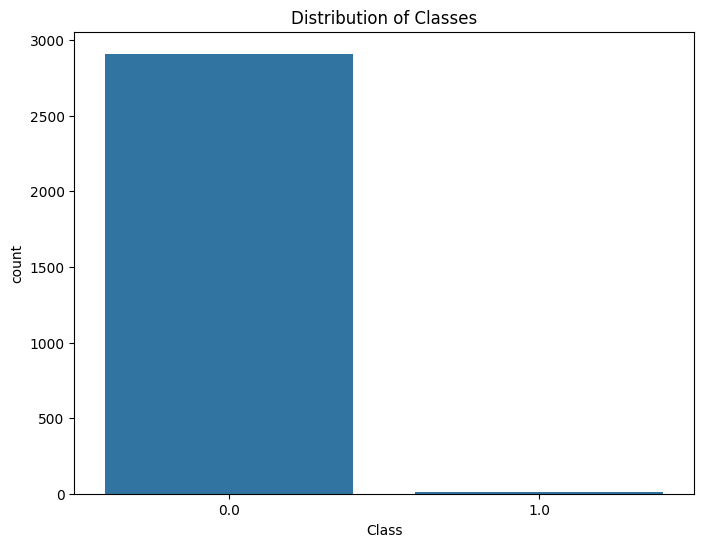

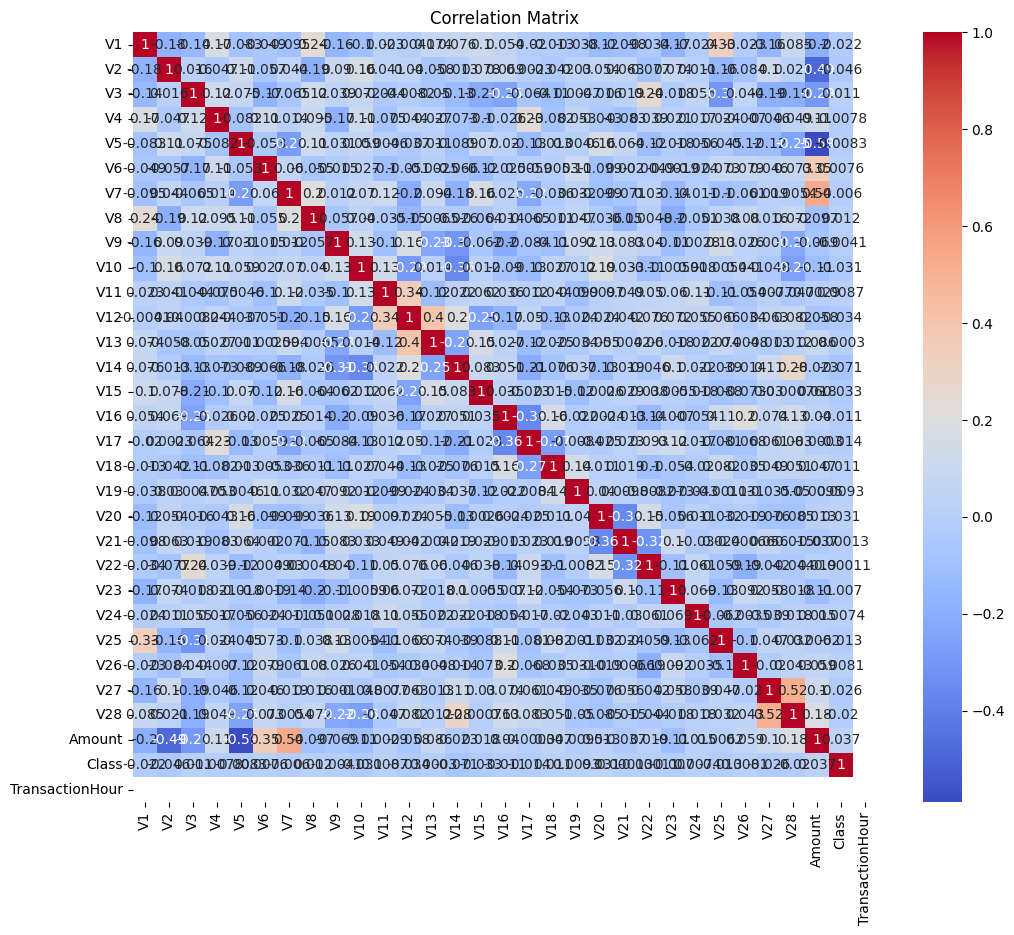

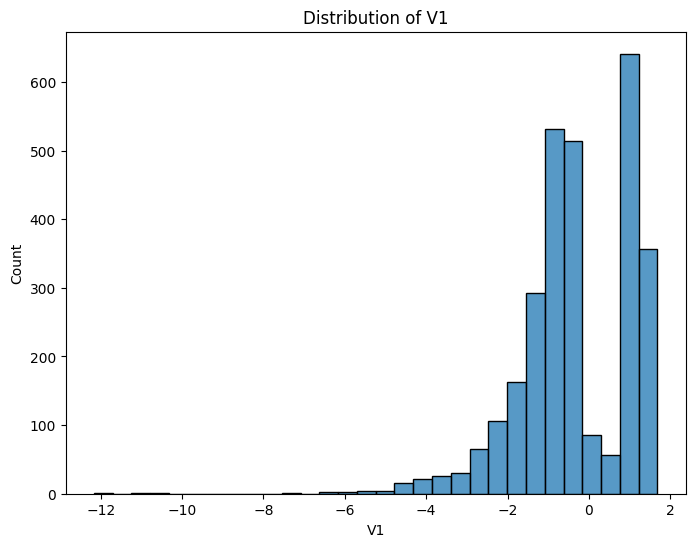

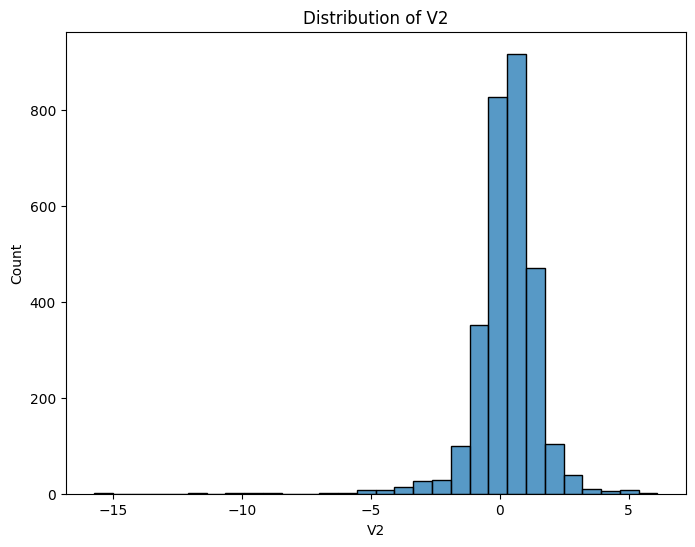

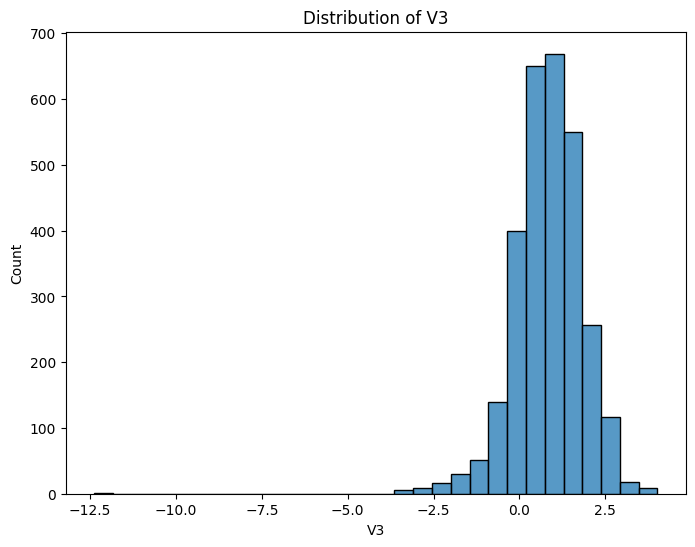

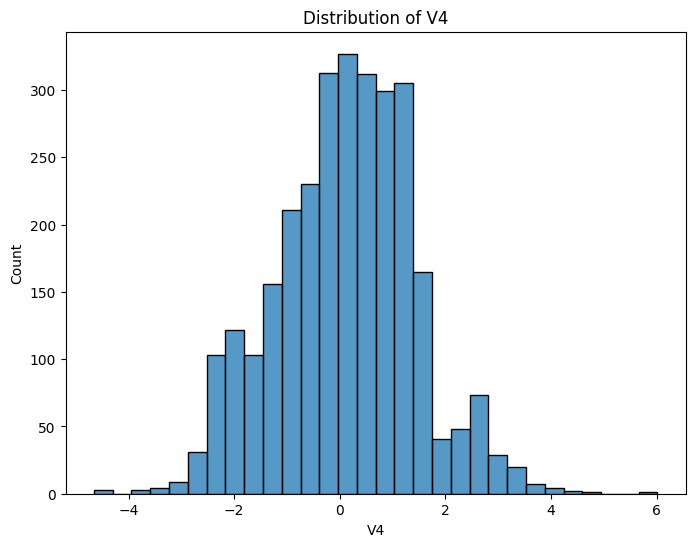

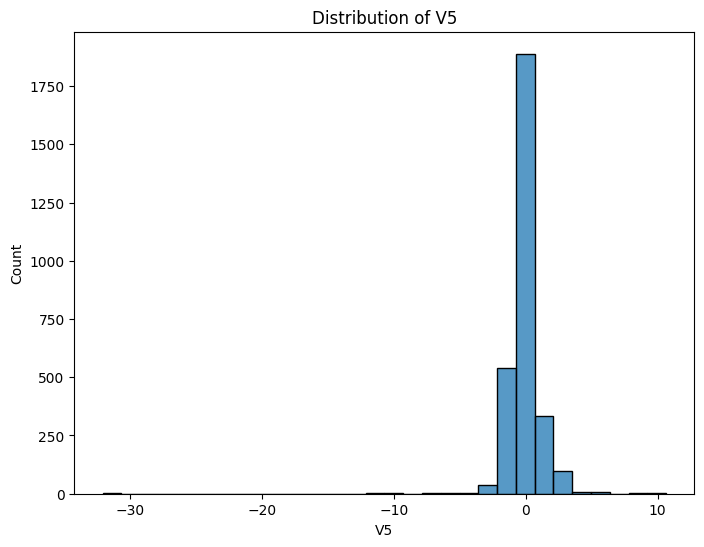

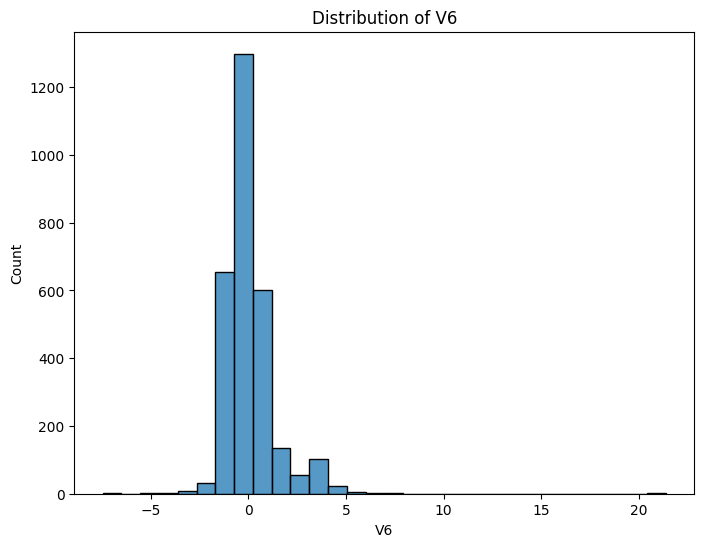

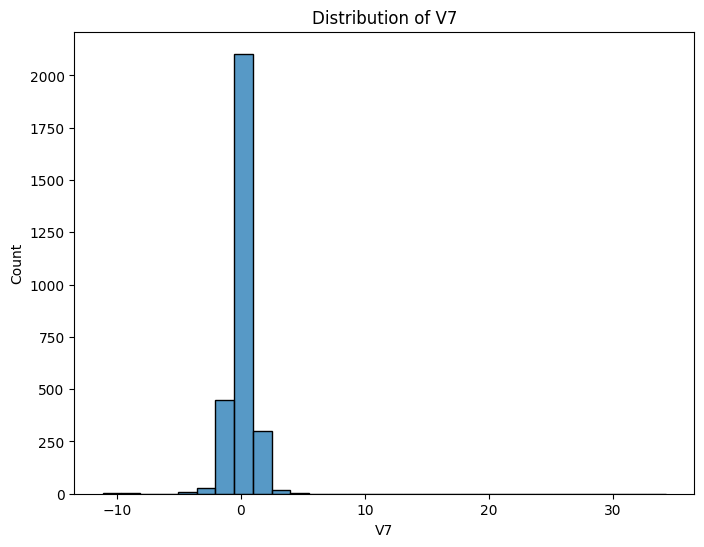

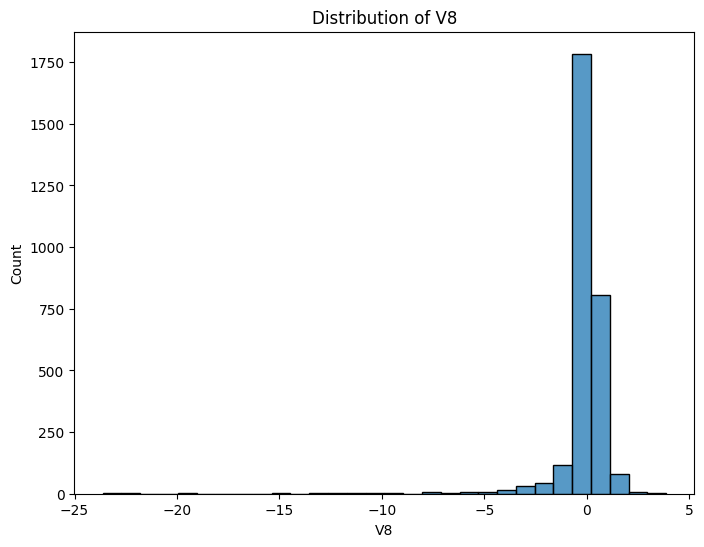

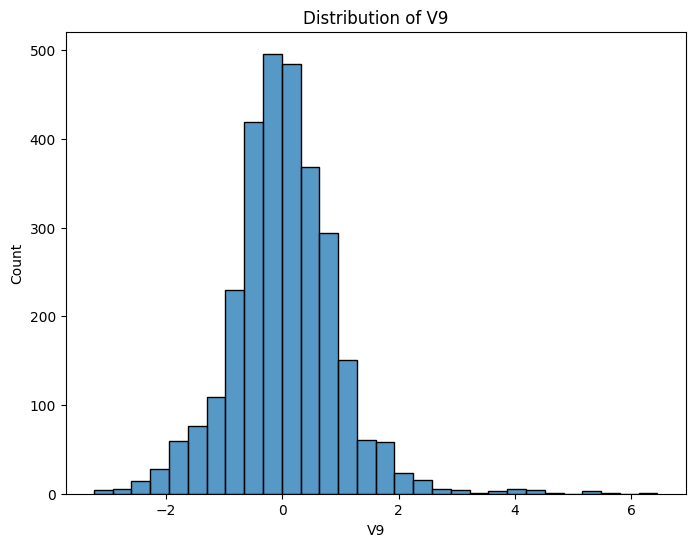

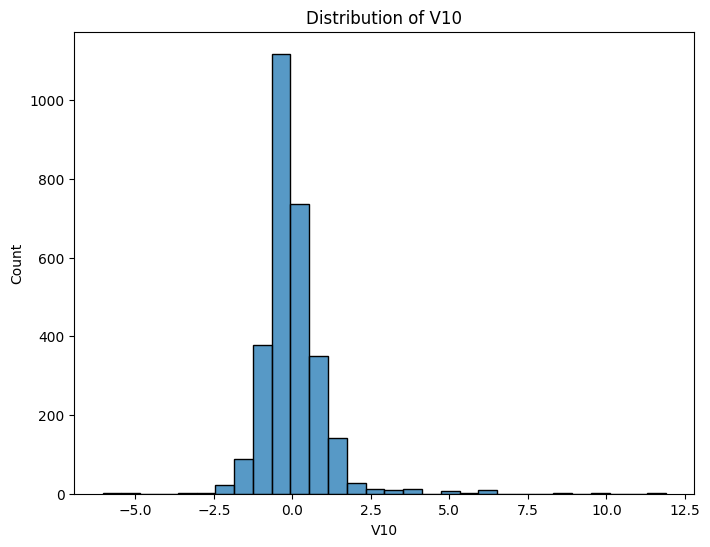

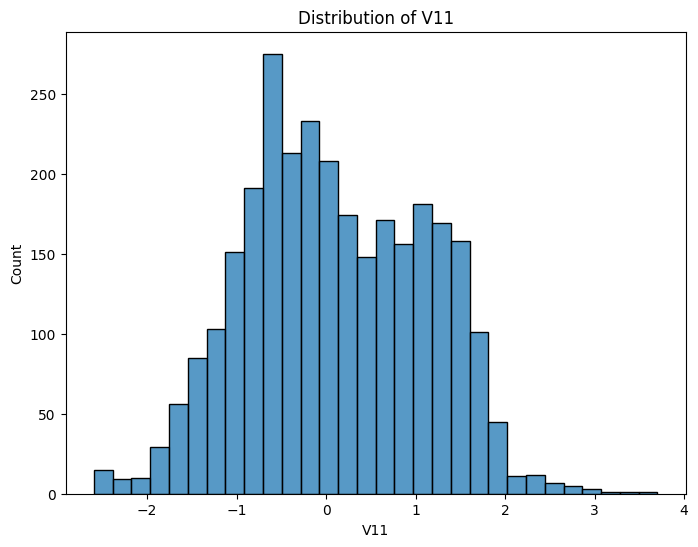

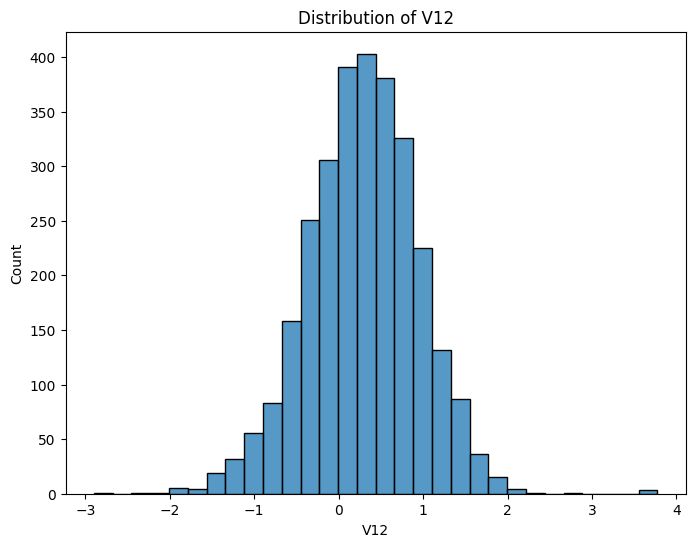

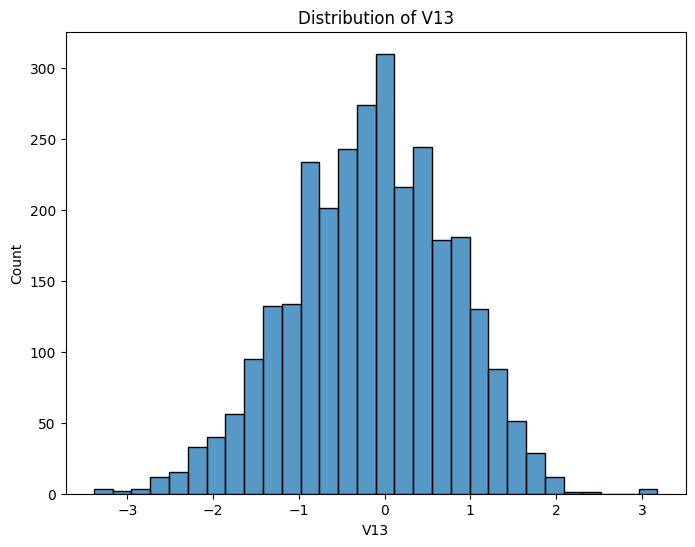

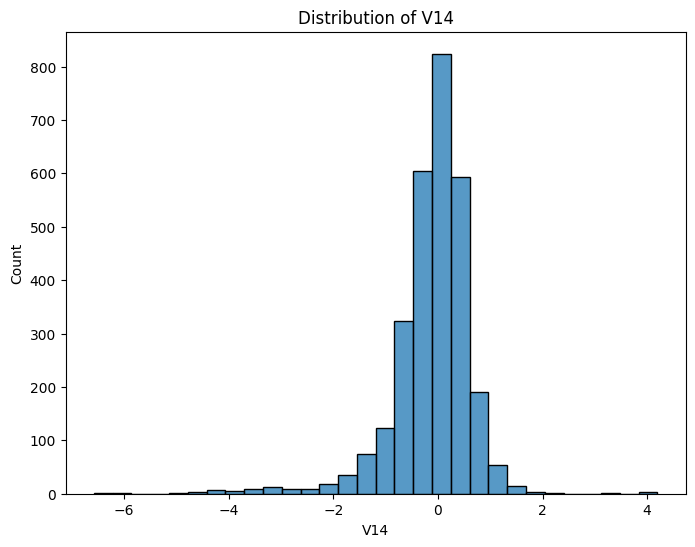

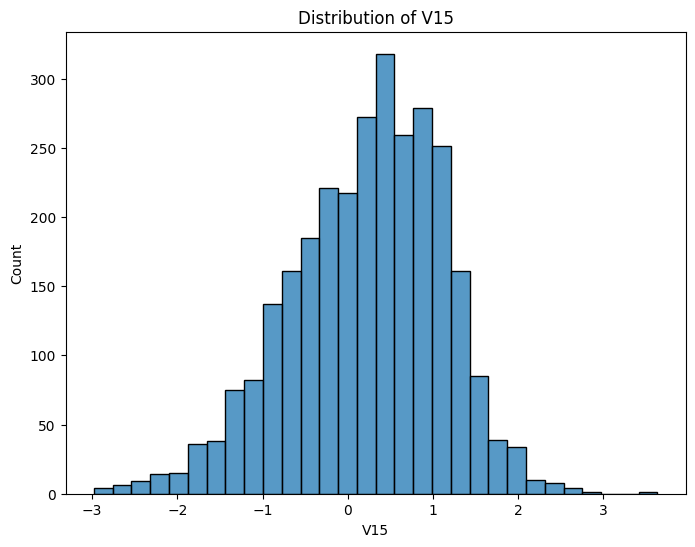

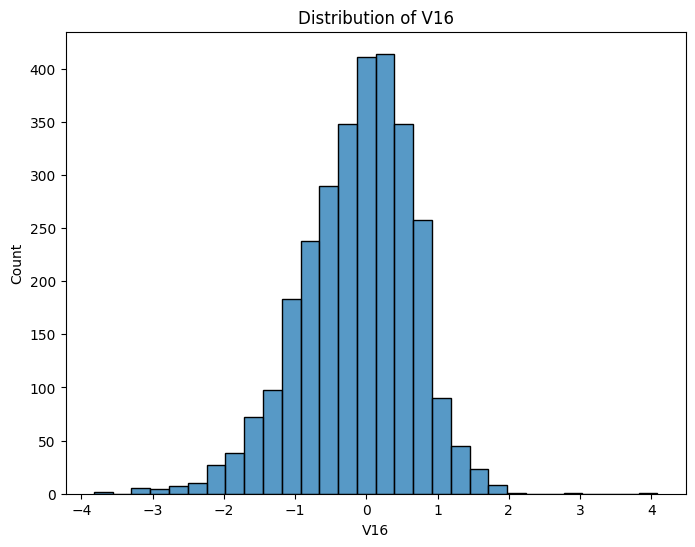

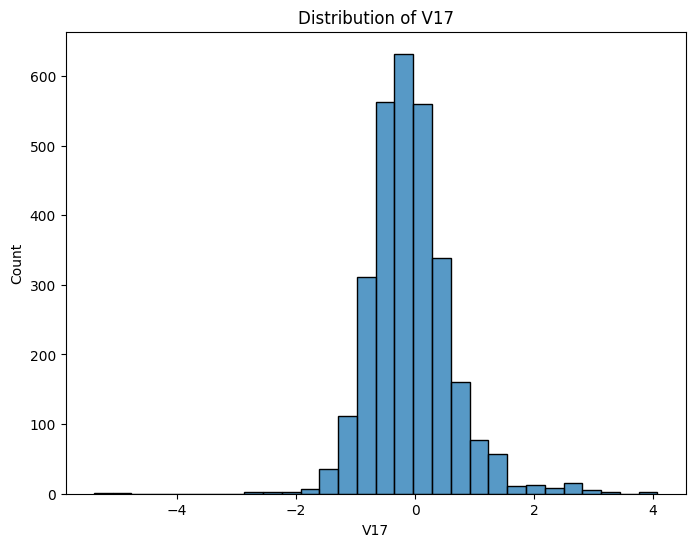

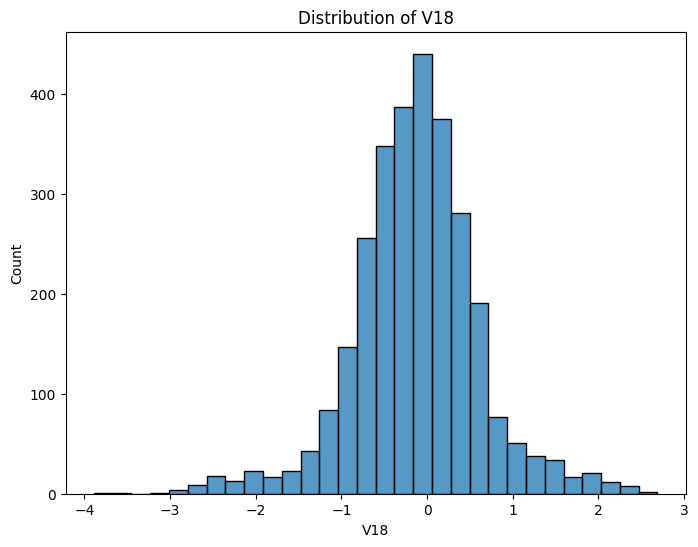

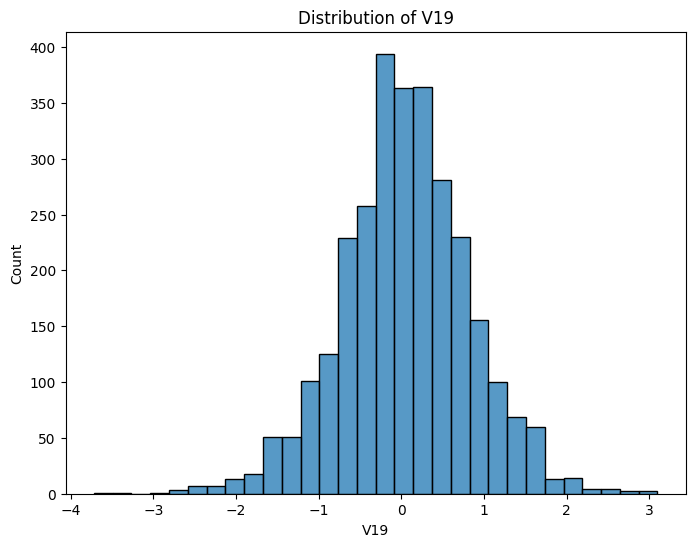

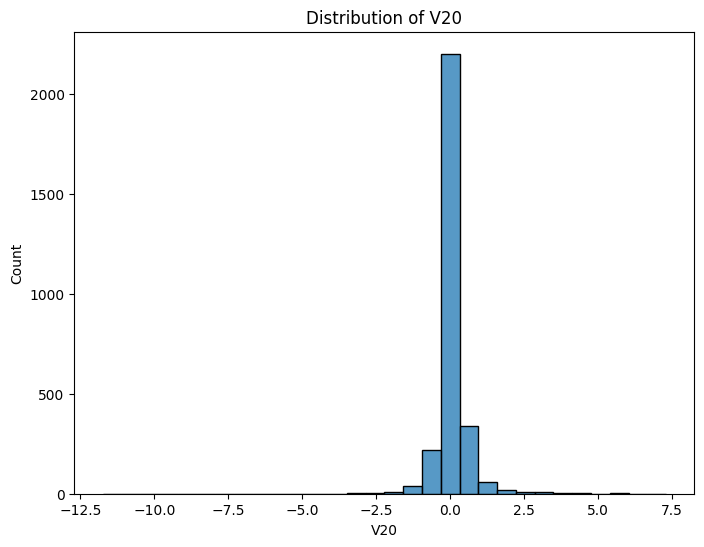

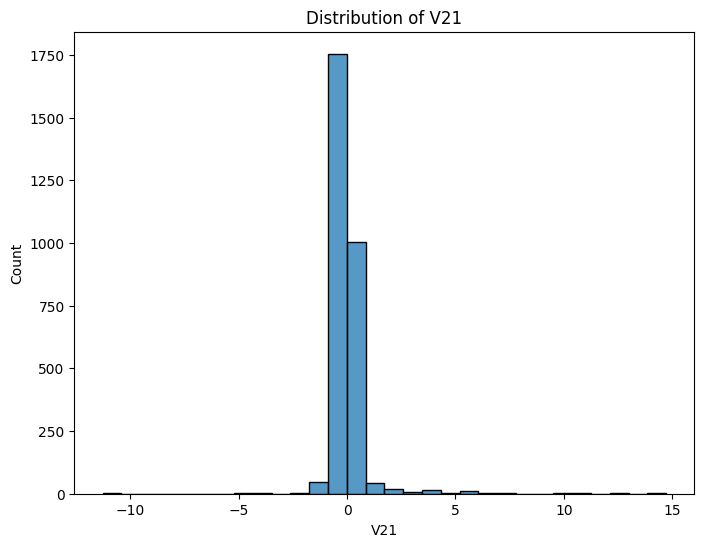

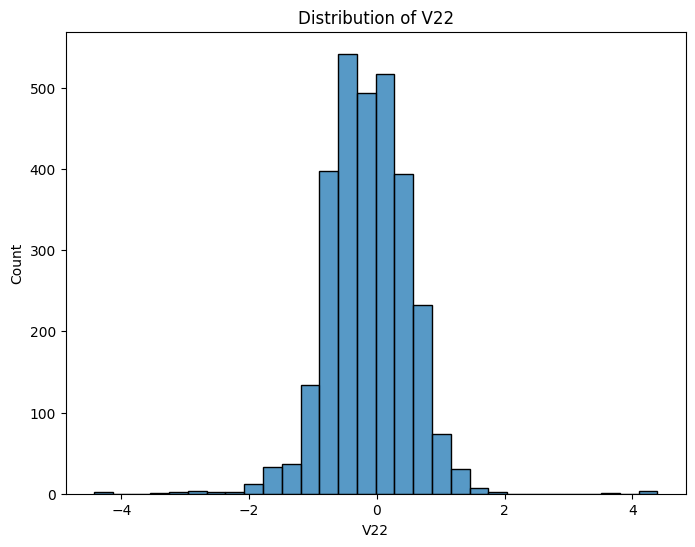

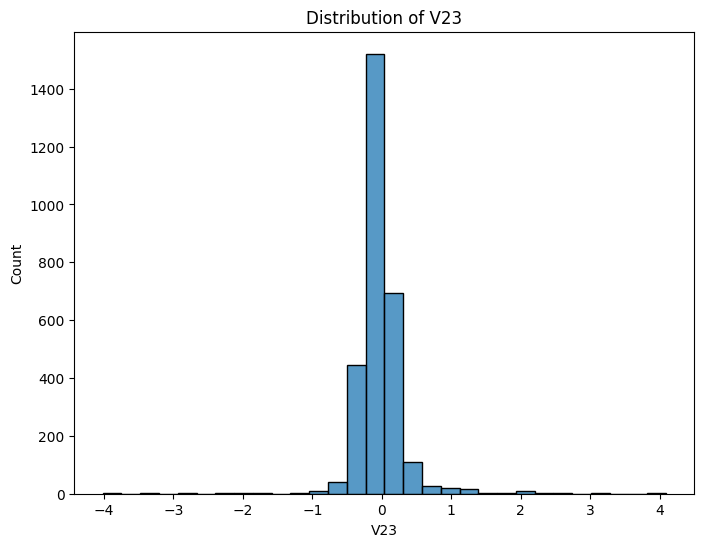

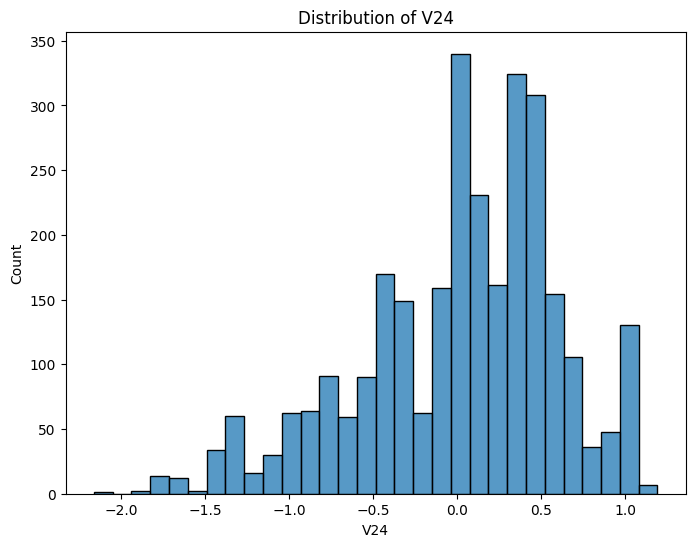

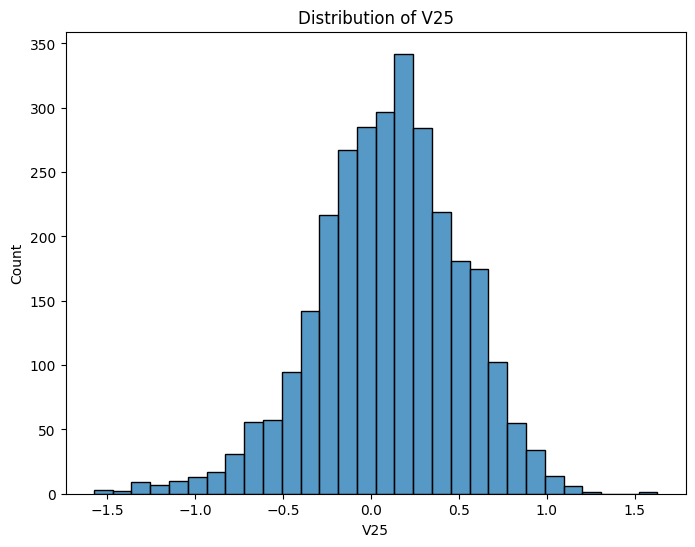

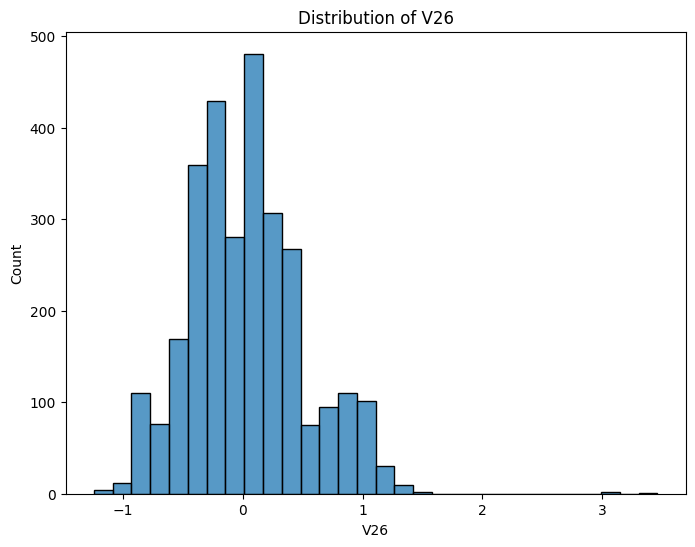

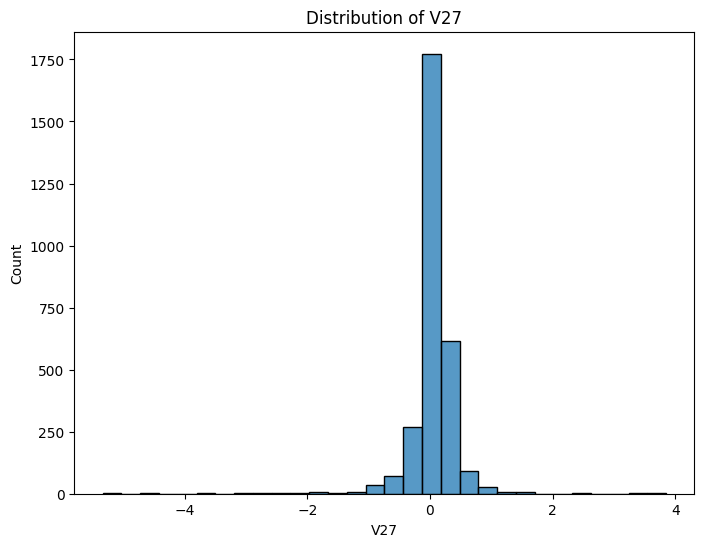

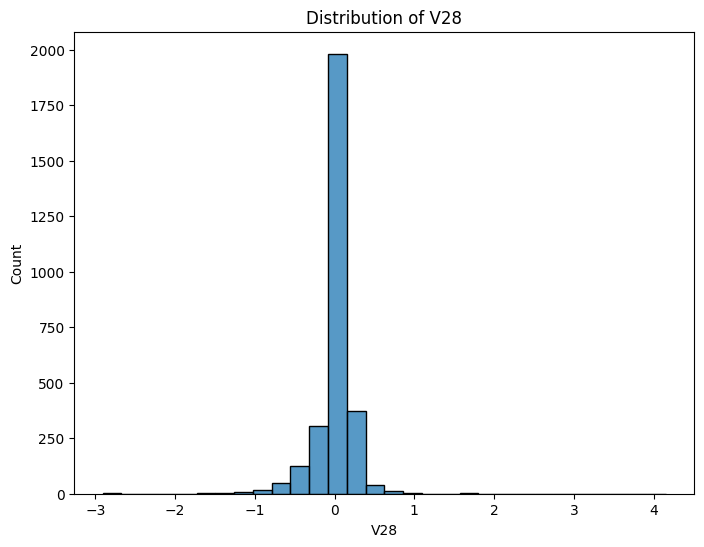

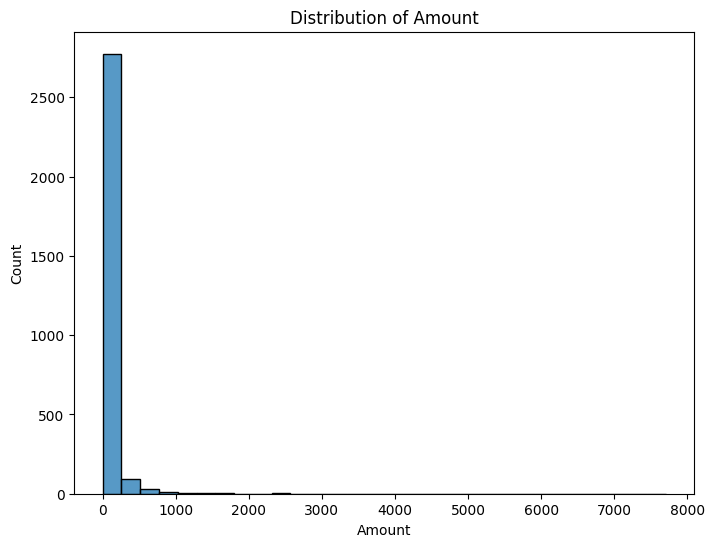

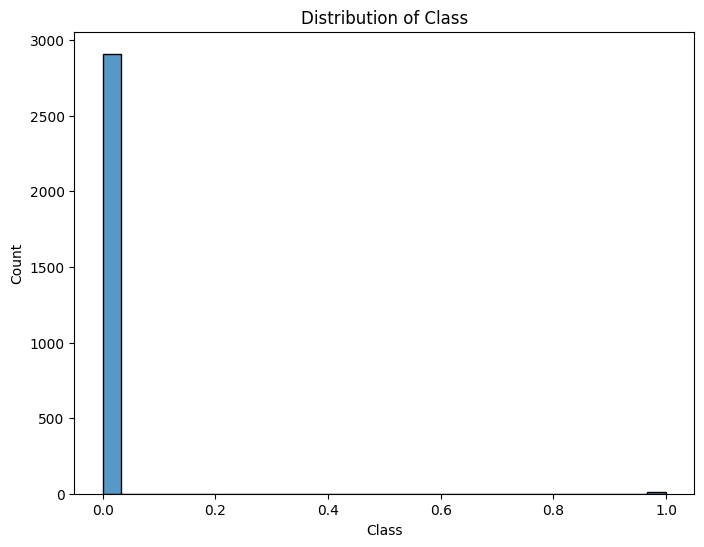

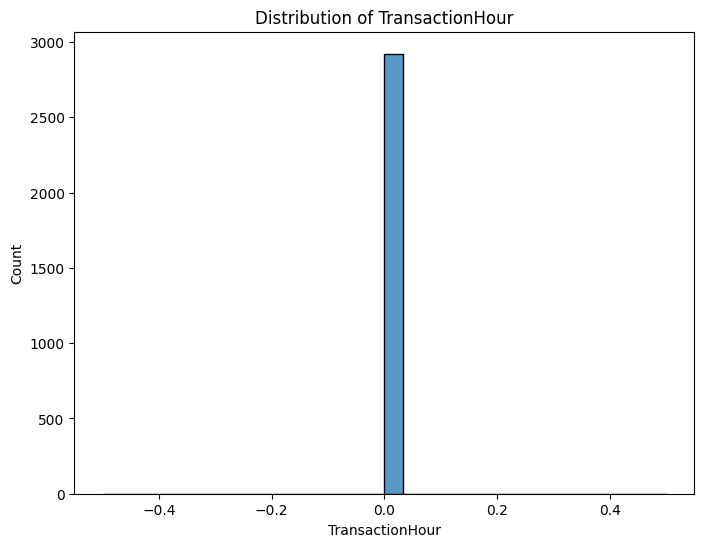

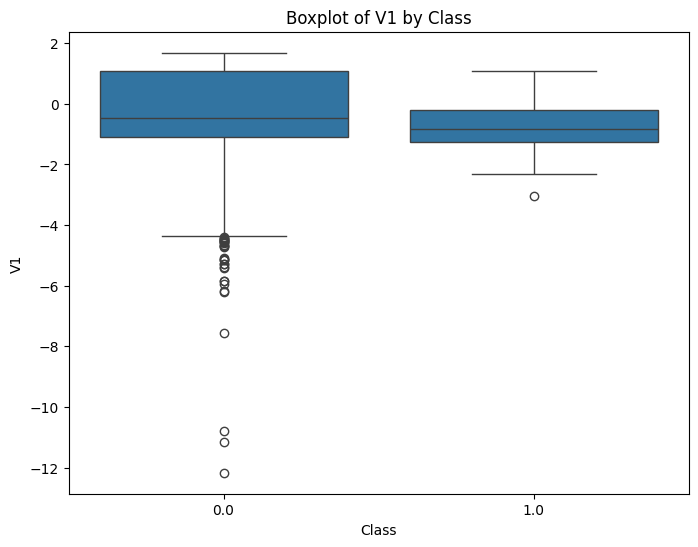

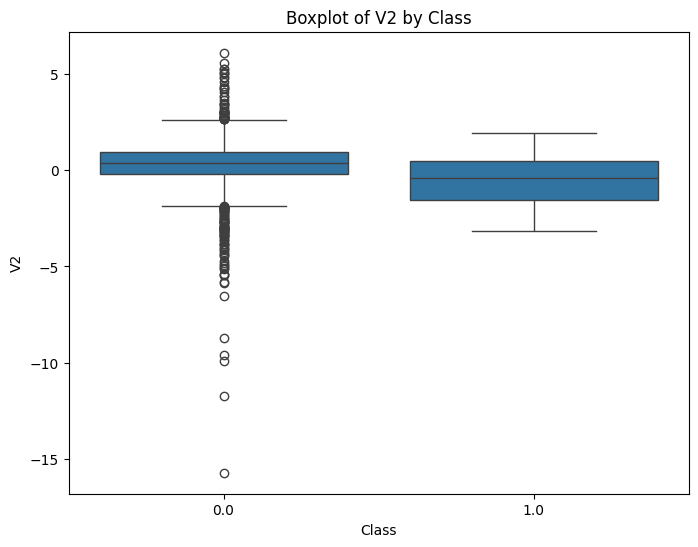

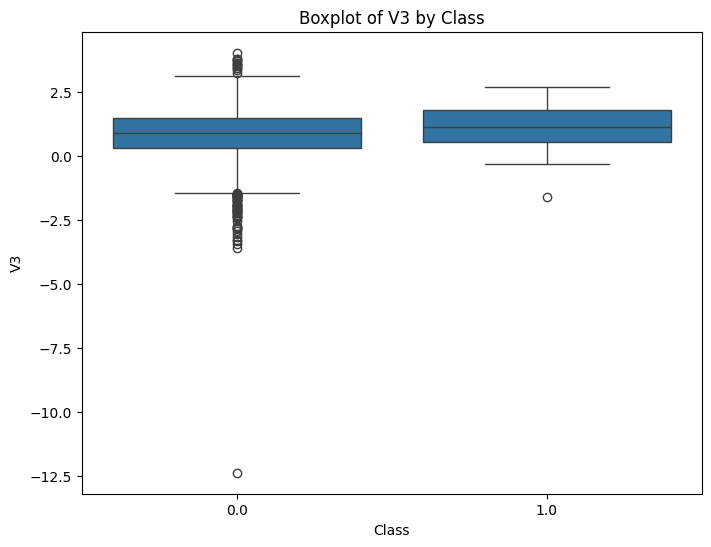

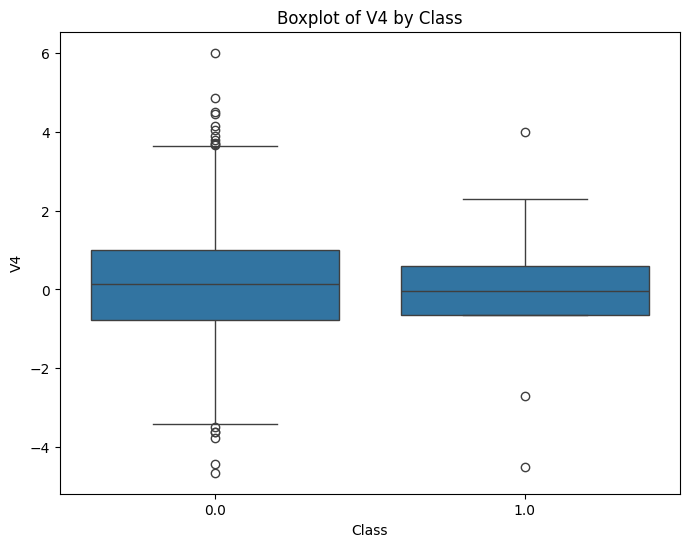

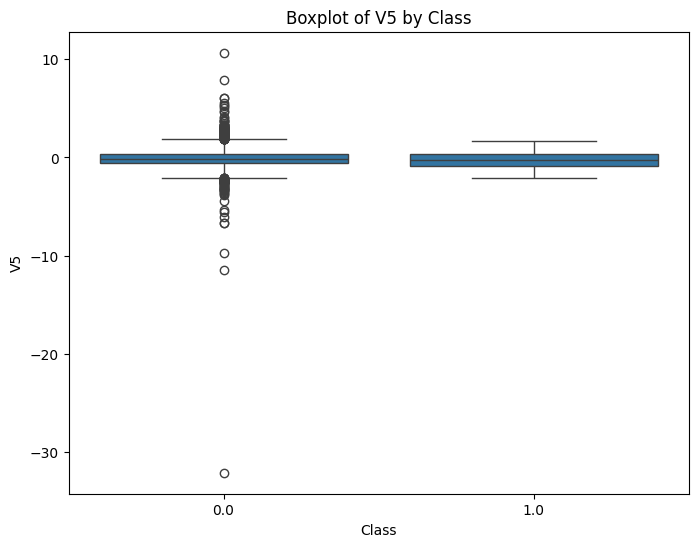

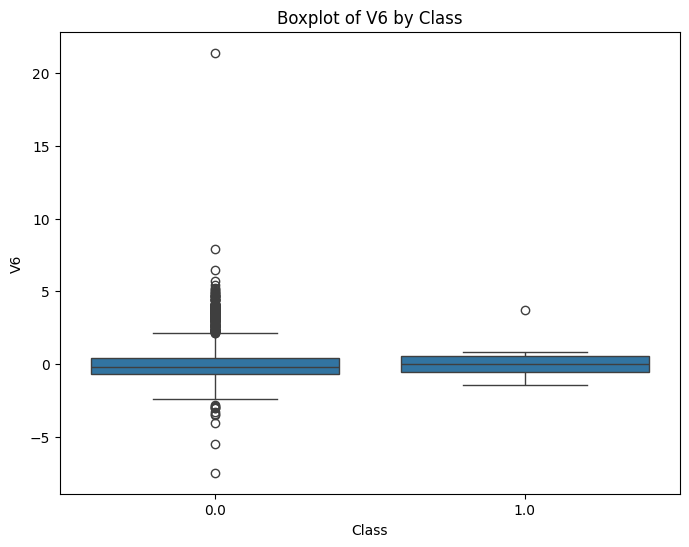

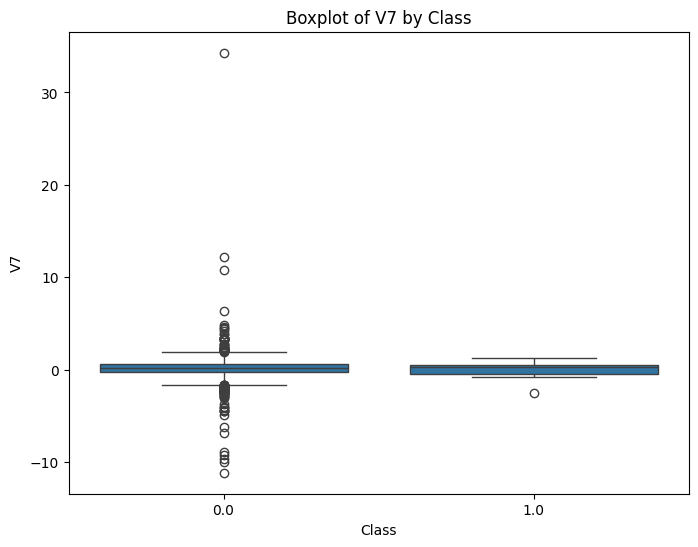

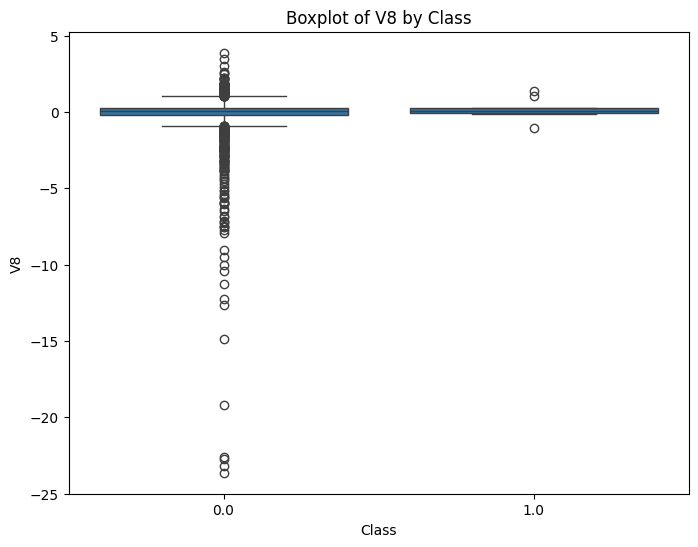

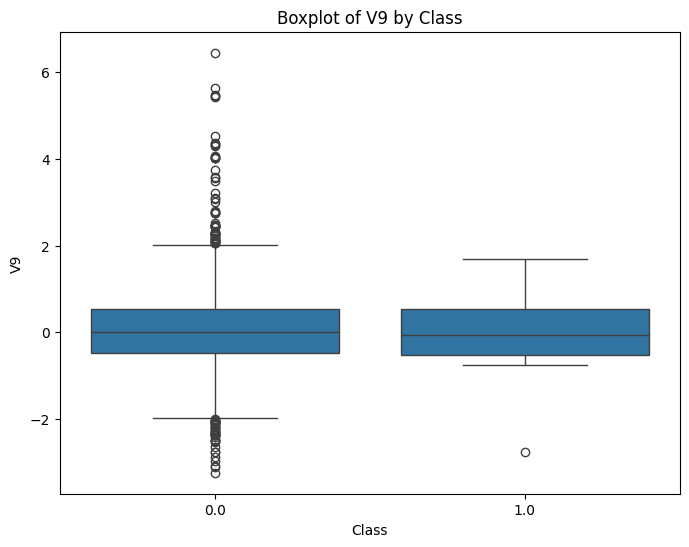

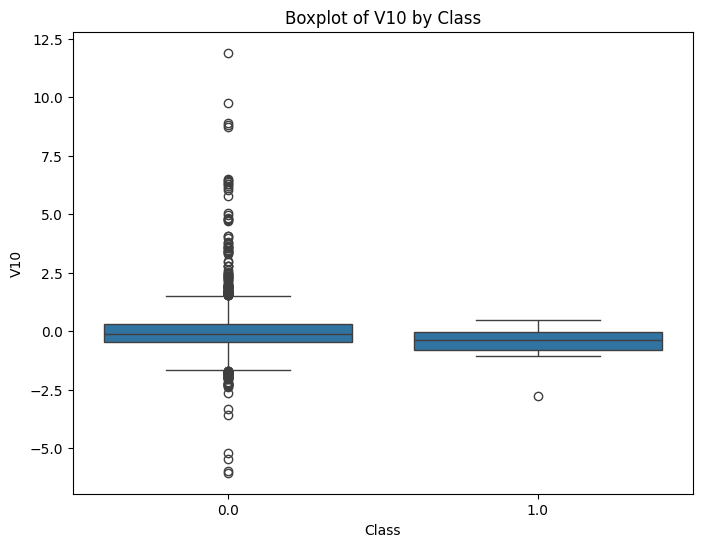

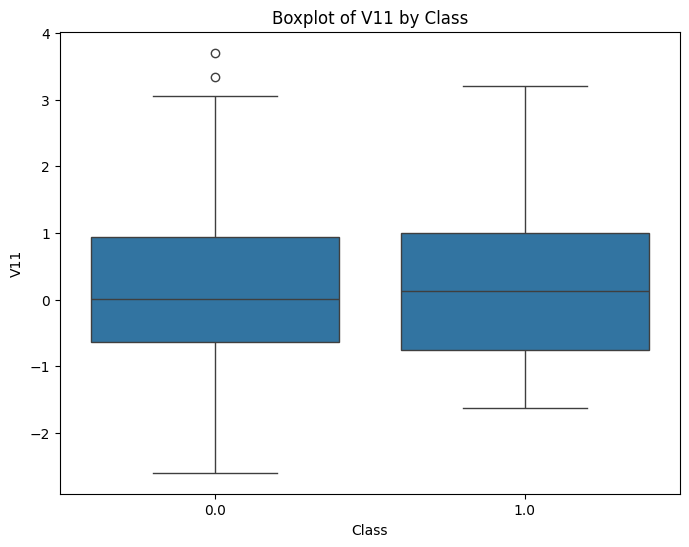

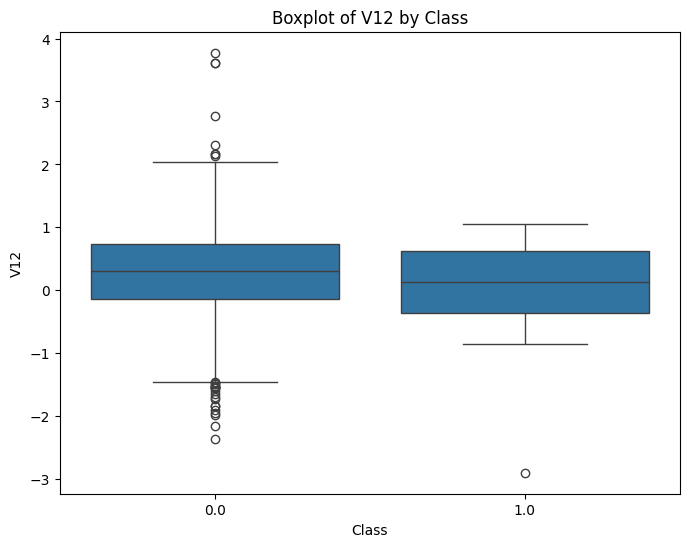

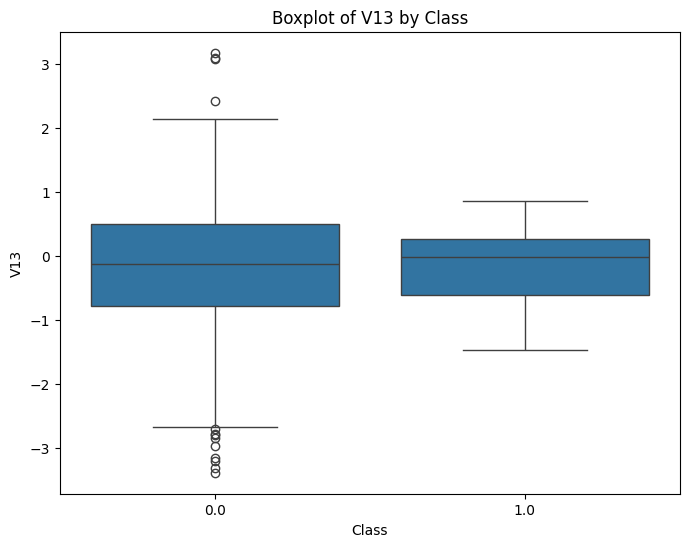

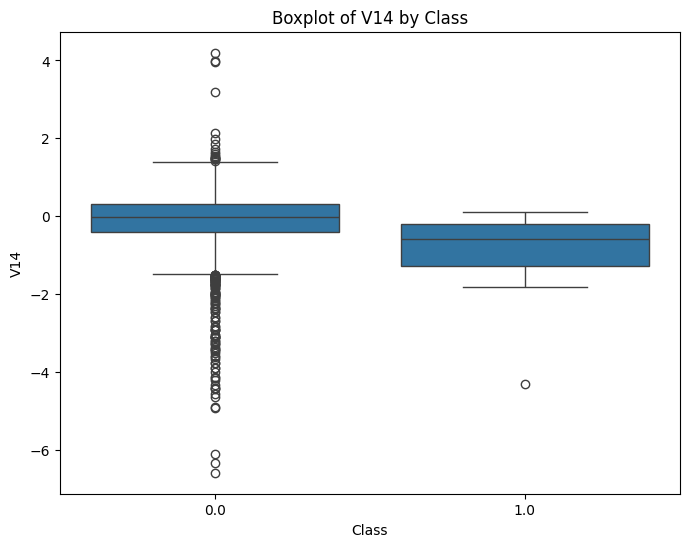

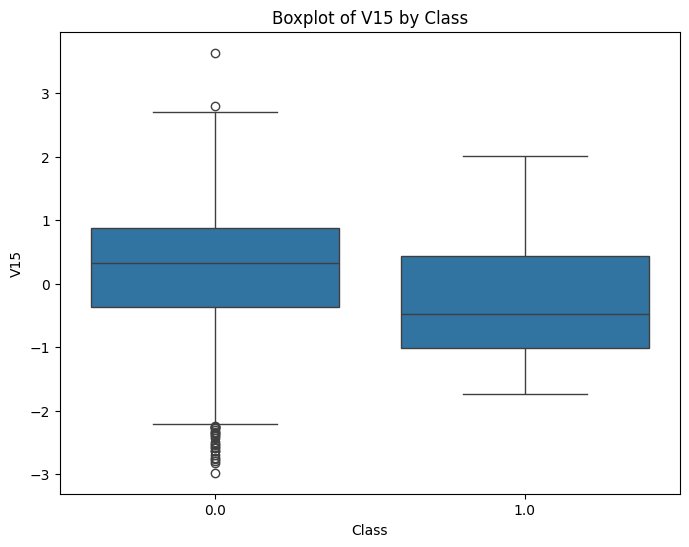

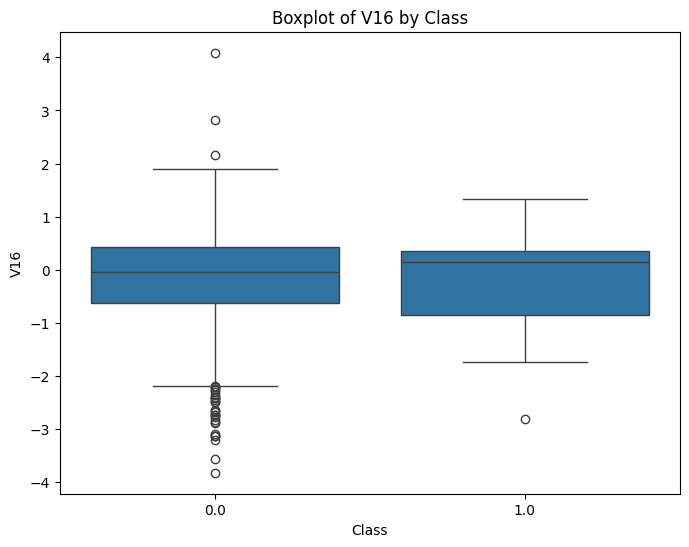

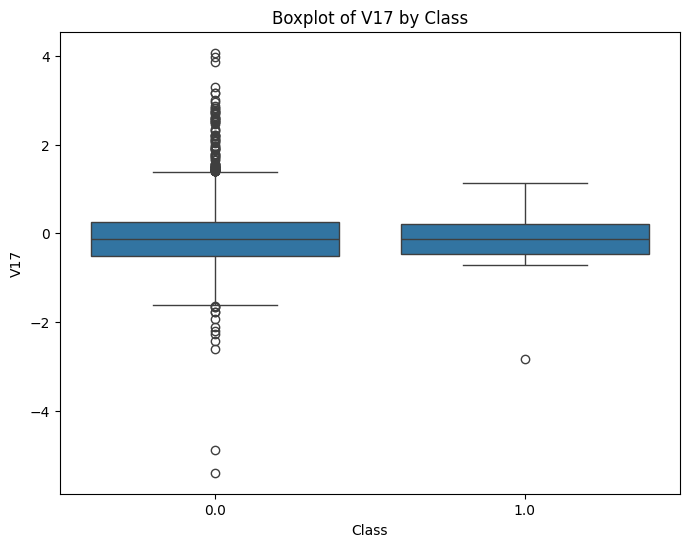

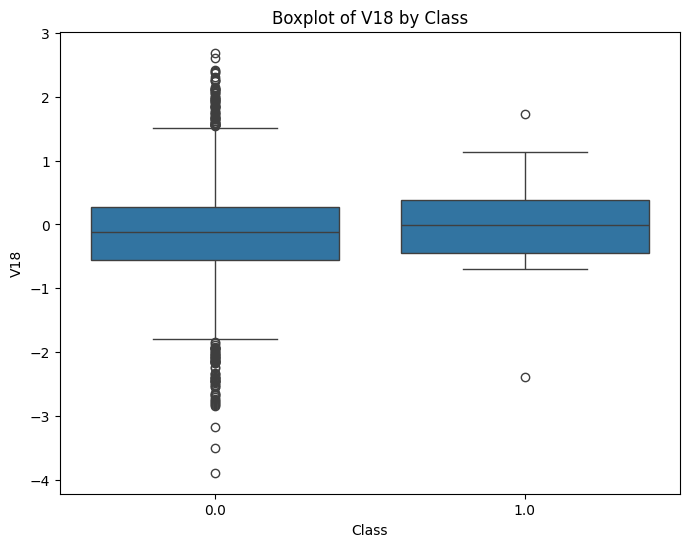

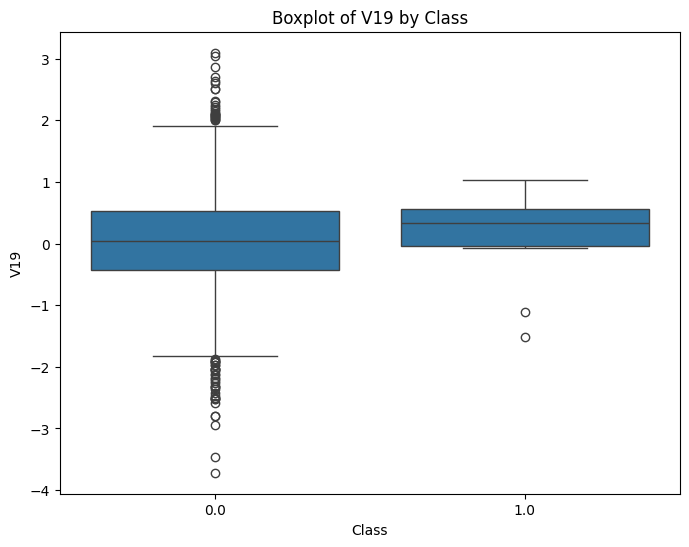

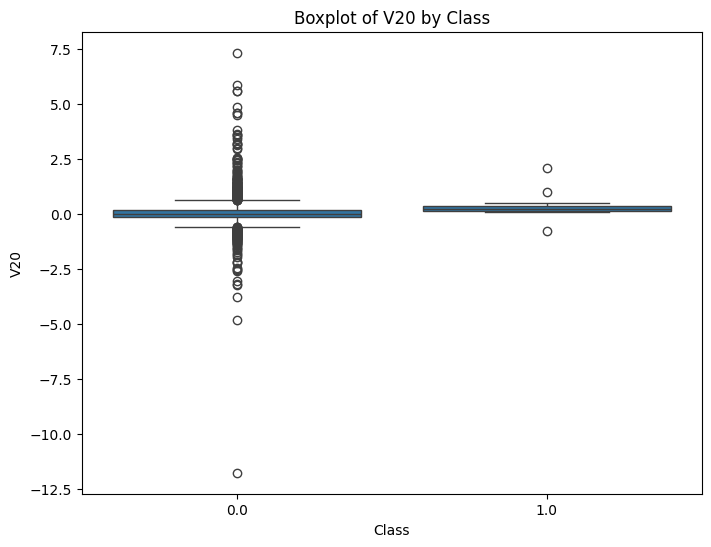

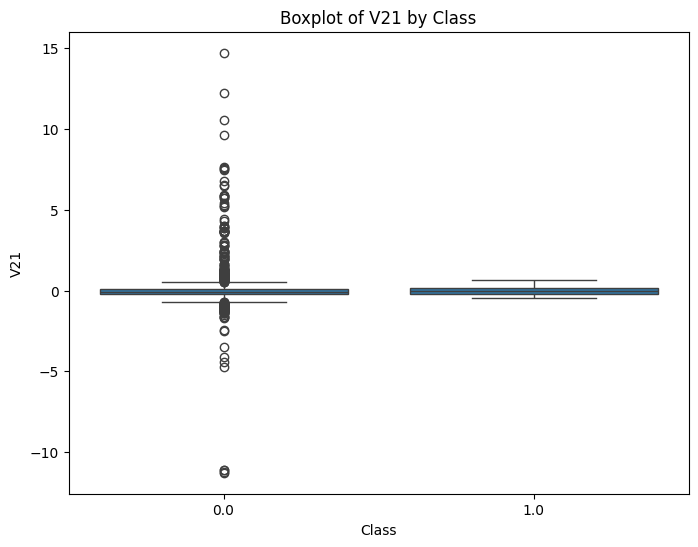

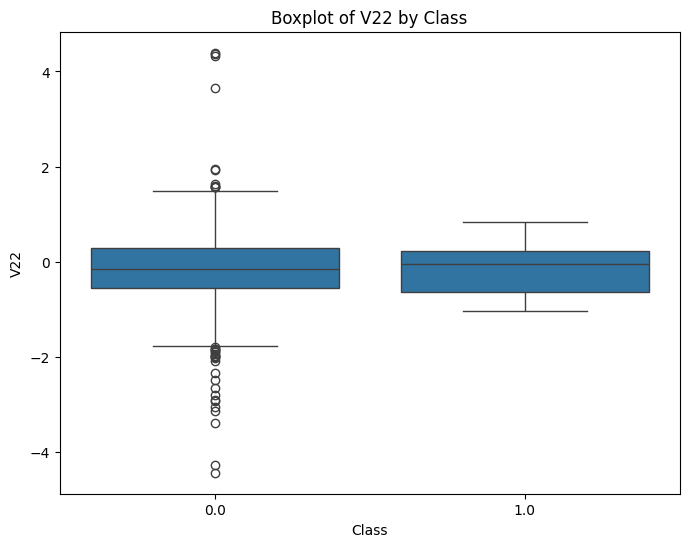

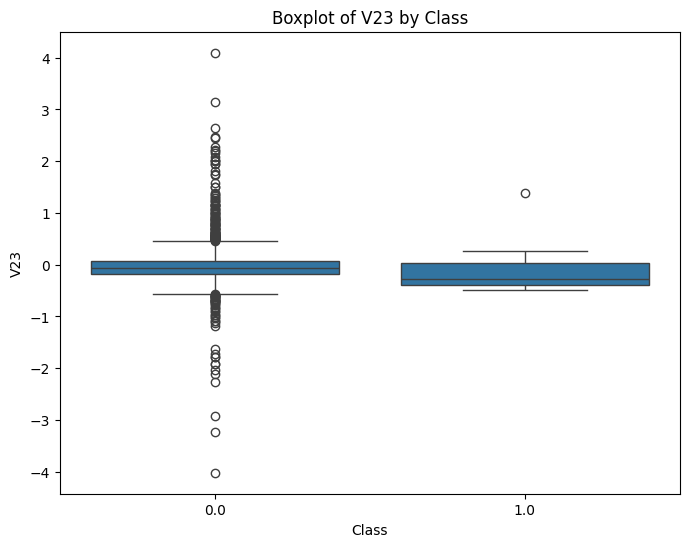

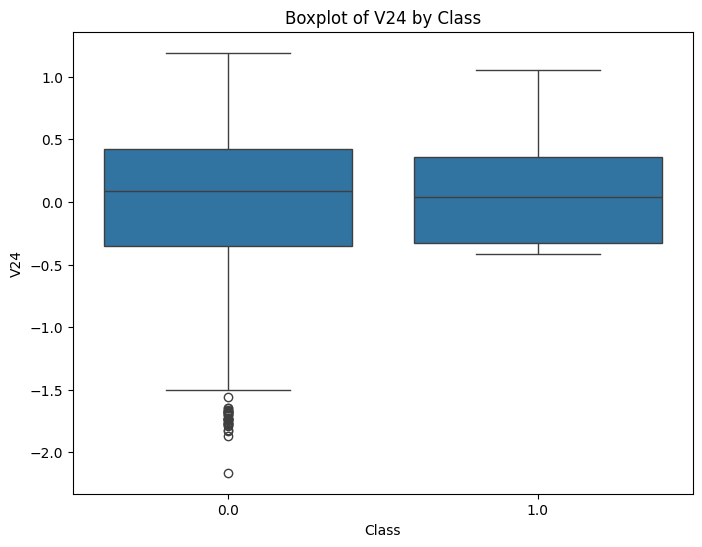

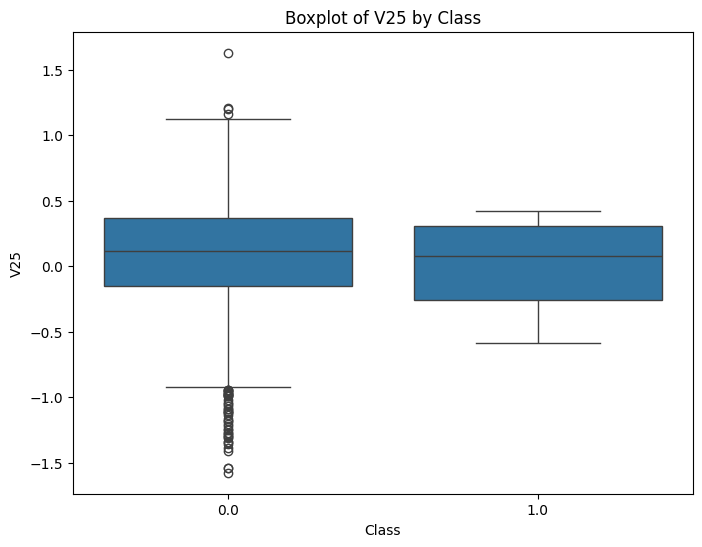

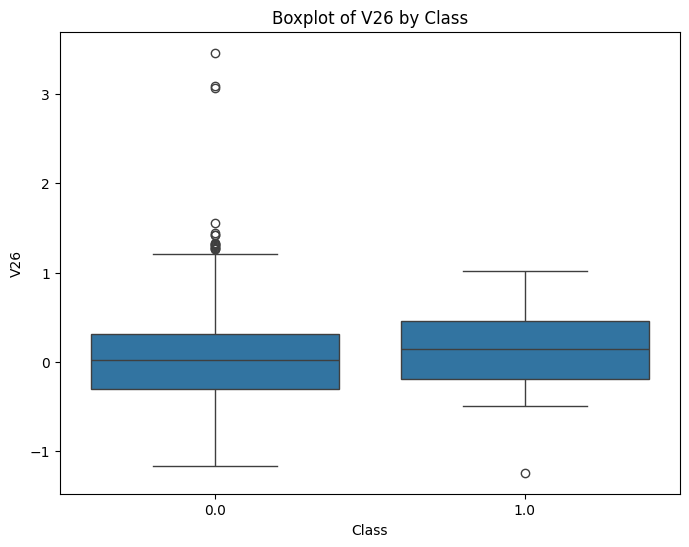

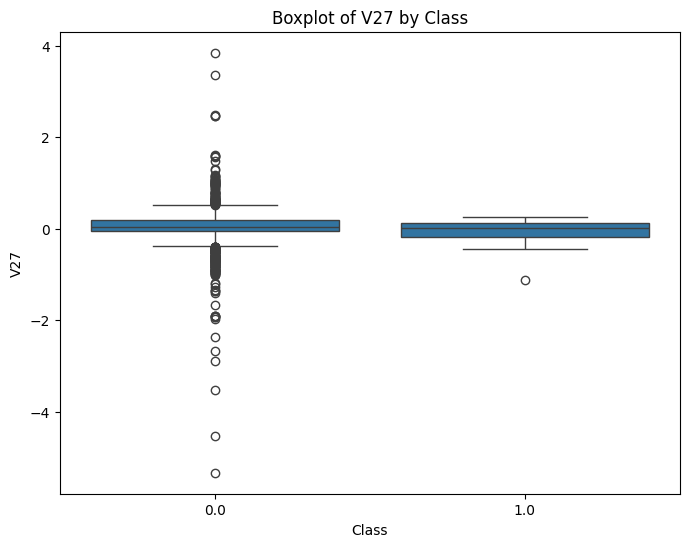

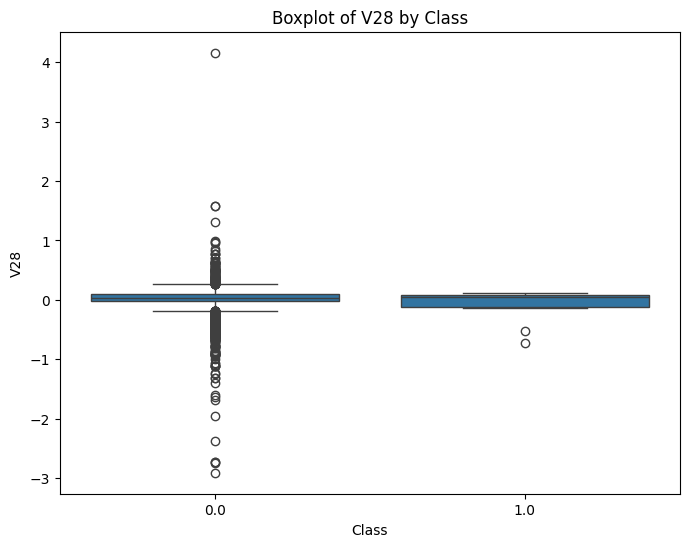

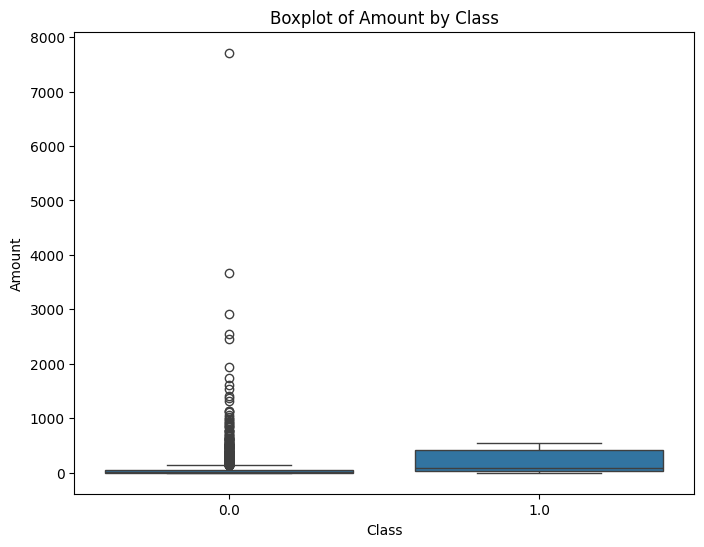

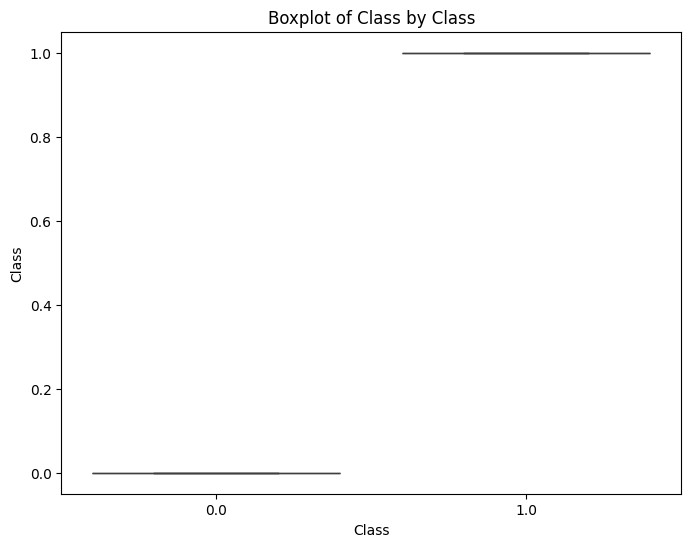

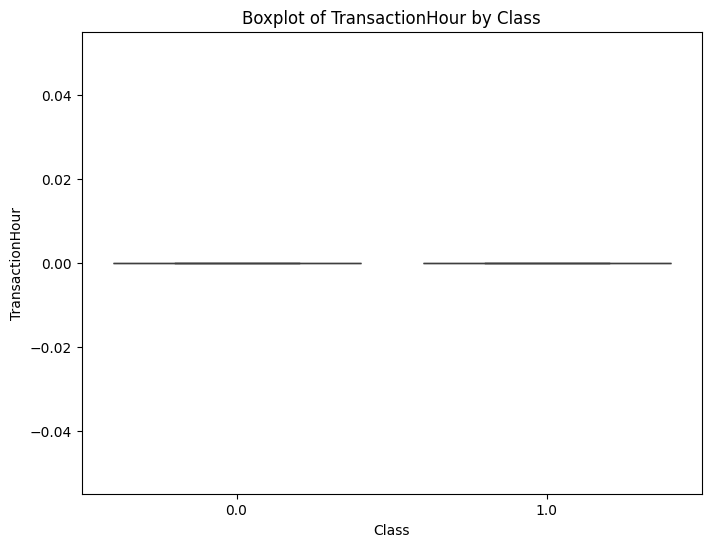

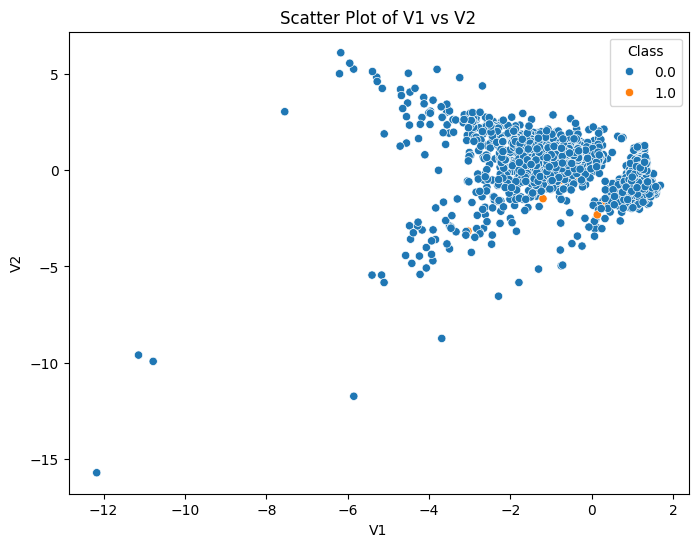

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


print(data.columns)


plt.figure(figsize=(8, 6))


sns.countplot(x='Class', data=data)

plt.title('Distribution of Classes')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

numerical_features = data.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Class')
    plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=data)
plt.title('Scatter Plot of V1 vs V2')
plt.show()


Model Selection


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


Model Training


In [23]:
rf_model.fit(X_res, y_res)
svm_model.fit(X_res, y_res)
nn_model.fit(X_res, y_res)


MLPClassifier(max_iter=500, random_state=42)

Model Evaluation

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
